In [ ]:
import re
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Activation,Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten,GlobalMaxPooling1D,Conv1D, Embedding, LSTM

In [ ]:
import pandas as pd
import numpy as np  # Import NumPy

# Load the CSV file into a DataFrame, skipping problematic lines
df = pd.read_csv("/content/IMDB Dataset.csv", on_bad_lines='skip')

# Display the first few rows of the DataFrame
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89647 entries, 0 to 89646
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review,sentiment  89647 non-null  object
dtypes: object(1)
memory usage: 700.5+ KB


In [ ]:
df.isnull().sum()

review,sentiment    0
dtype: int64

Index(['review', 'sentiment'], dtype='object')


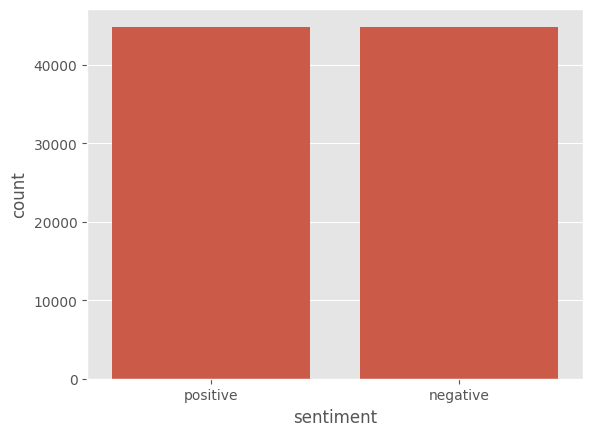

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the CSV file, ensuring correct delimiter and handling bad lines
df = pd.read_csv("/content/IMDB Dataset.csv", delimiter=",", on_bad_lines='skip')

# Print column names to verify if 'sentiment' exists and check for typos
print(df.columns)

# If 'sentiment' is not the exact name, correct it in the plotting code
sns.countplot(data=df, x="sentiment")  # Replace "sentiment" with the actual column name if needed
plt.show()

In [ ]:
df["sentiment"].value_counts()

sentiment
negative    44879
positive    44847
Name: count, dtype: int64

In [ ]:
df["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
stopwords_list = set(stopwords.words('english'))


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


class CustomPreprocess():

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        sen = sen.lower()

        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)

        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)

        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)

        return sentence

In [ ]:
custom = CustomPreprocess()
custom.preprocess_text("I thought this was a wonderful way to spend time on a too hot summer weekend")

'thought wonderful way spend time hot summer weekend'

In [ ]:
x = []
sentences = list(df['review'])
for sen in sentences:
    x.append(custom.preprocess_text(sen))

In [ ]:
y = df['sentiment']
sentiment_map = {'negative' : 0, 'positive': 1}
y = np.array(y.map(sentiment_map))
y[:15]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
# Example data
x_train = ["This is the first sentence.", "Here is another one.", "And this is the third."]

# Import Tokenizer from Keras
from keras.preprocessing.text import Tokenizer

# Initialize the Tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(x_train)

# Convert texts to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)

print(x_train_sequences)


[[2, 1, 3, 4, 5], [6, 1, 7, 8], [9, 2, 1, 3, 10]]


In [ ]:
import io
import json
tokenizer_json = tokenizer.to_json()

with io.open("tokenizer.json", 'w', encoding = "utf-8") as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii = False))

In [ ]:
vocab_length = len(tokenizer.word_index)+1
vocab_length

1

In [ ]:
maxlen = 100

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [ ]:
embedding_dict = dict()
glove_file = open("/content/glove.6B.100d.txt", encoding = 'utf8')
embeddings_dictionary = dict()
for line in glove_file:
    records = line.split()
    words = records[0]
    vector_dimensions = np.asarray(records[1:], dtype = 'float32')
    embeddings_dictionary[words] = vector_dimensions
glove_file.close()

In [ ]:
print(list(tokenizer.word_index.items())[:15])

[('is', 1), ('this', 2), ('the', 3), ('first', 4), ('sentence', 5), ('here', 6), ('another', 7), ('one', 8), ('and', 9), ('third', 10)]


In [ ]:
embeddings_dictionary.get('film')

array([ 0.19916 , -0.049702,  0.24579 , -0.32281 ,  0.89768 , -0.1278  ,
       -0.49506 ,  0.20814 , -0.20046 , -0.20604 ,  0.038292, -0.67277 ,
       -0.12689 , -0.18766 , -0.10277 ,  0.73128 ,  0.82408 ,  0.087288,
        0.69255 ,  1.3107  ,  0.49113 , -0.38097 ,  0.24338 , -0.27813 ,
        0.62506 ,  0.35978 ,  0.42041 , -0.24529 ,  0.14861 , -0.26726 ,
       -0.56262 ,  0.63843 , -0.54153 ,  0.36537 ,  0.20545 , -0.16604 ,
        0.72434 ,  0.29961 , -0.42501 , -0.35932 , -0.089288,  0.48752 ,
       -1.0927  ,  0.88818 ,  0.89941 , -0.7541  , -0.35492 , -0.76396 ,
        0.27468 ,  0.2757  , -0.48152 , -0.41399 ,  0.64489 ,  1.148   ,
       -0.29131 , -2.9387  , -0.83162 ,  0.95586 ,  1.1623  , -0.42502 ,
        0.15486 ,  2.2326  , -0.31339 , -0.030228,  0.79802 , -0.41302 ,
        0.72885 ,  0.7296  , -0.31909 ,  0.8956  ,  0.34625 ,  0.2923  ,
        0.40056 ,  0.78985 , -0.43999 ,  0.24698 , -0.46548 ,  0.055886,
       -0.62603 , -0.036487, -0.65429 ,  0.10563 , 

In [ ]:
embeddings_dictionary['film']

array([ 0.19916 , -0.049702,  0.24579 , -0.32281 ,  0.89768 , -0.1278  ,
       -0.49506 ,  0.20814 , -0.20046 , -0.20604 ,  0.038292, -0.67277 ,
       -0.12689 , -0.18766 , -0.10277 ,  0.73128 ,  0.82408 ,  0.087288,
        0.69255 ,  1.3107  ,  0.49113 , -0.38097 ,  0.24338 , -0.27813 ,
        0.62506 ,  0.35978 ,  0.42041 , -0.24529 ,  0.14861 , -0.26726 ,
       -0.56262 ,  0.63843 , -0.54153 ,  0.36537 ,  0.20545 , -0.16604 ,
        0.72434 ,  0.29961 , -0.42501 , -0.35932 , -0.089288,  0.48752 ,
       -1.0927  ,  0.88818 ,  0.89941 , -0.7541  , -0.35492 , -0.76396 ,
        0.27468 ,  0.2757  , -0.48152 , -0.41399 ,  0.64489 ,  1.148   ,
       -0.29131 , -2.9387  , -0.83162 ,  0.95586 ,  1.1623  , -0.42502 ,
        0.15486 ,  2.2326  , -0.31339 , -0.030228,  0.79802 , -0.41302 ,
        0.72885 ,  0.7296  , -0.31909 ,  0.8956  ,  0.34625 ,  0.2923  ,
        0.40056 ,  0.78985 , -0.43999 ,  0.24698 , -0.46548 ,  0.055886,
       -0.62603 , -0.036487, -0.65429 ,  0.10563 , 

In [ ]:
embedding_matrix = np.zeros((vocab_length, 100)) #100
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(298, 100)

In [ ]:
snn = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
snn.add(embedding_layer)
snn.add(Flatten())
snn.add(Dense(16, activation='relu'))
snn.add(Dense(1,activation = 'sigmoid'))

In [ ]:
snn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
snn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          29800     
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 189833 (741.54 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 29800 (116.41 KB)
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 3s 156ms/step - loss: 0.6982 - accuracy: 0.5138 - val_loss: 0.6905 - val_accuracy: 0.5550
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5138 - val_loss: 0.6905 - val_accuracy: 0.5250
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6904 - accuracy: 0.5250 - val_loss: 0.6896 - val_accuracy: 0.5400
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.5475 - val_loss: 0.6885 - val_accuracy: 0.5850
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.6872 - accuracy: 0.5500 - val_loss: 0.6880 - val_accuracy: 0.5450
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.5450 - val_loss: 0.6874 - val_accuracy: 0.5550
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6821 - accuracy: 0.5650 - val_loss: 0.6874 - val_accuracy: 0.5650
Epoch 8/10
7/7 [==============

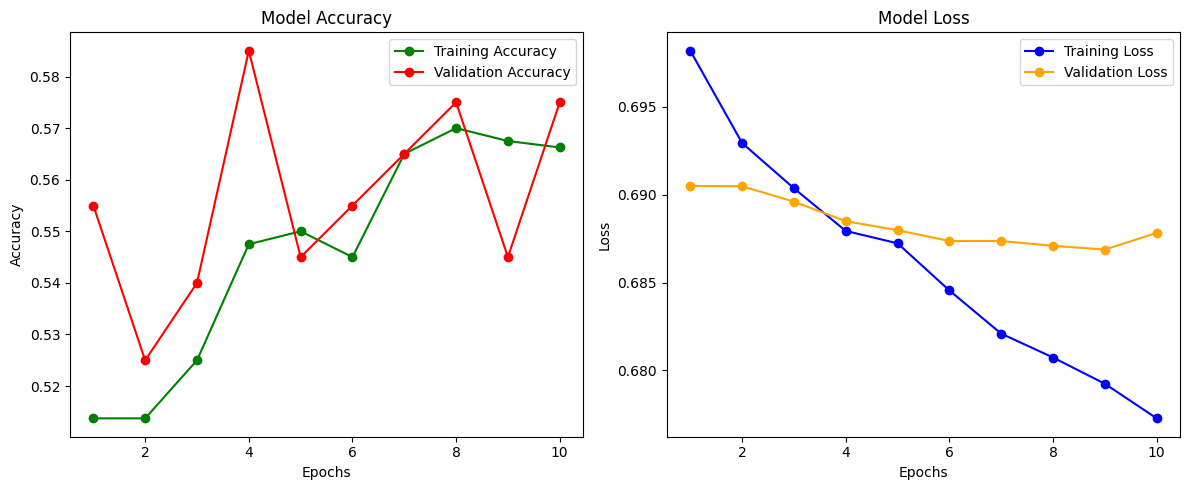

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Example data setup: Replace with your actual data
x_train = np.random.random((1000, 20))  # Example features, 1000 samples, 20 features each
y_train = np.random.randint(2, size=(1000, 1))  # Example binary labels, 1000 samples

# Define the Sequential Neural Network (SNN) model
snn = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),  # Input layer with 20 features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
snn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history_snn = snn.fit(x_train, y_train,
                      batch_size=128,
                      epochs=10,
                      verbose=1,
                      validation_split=0.2)

# Plotting the training history (accuracy and loss)
epochs = range(1, 11)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_snn.history['accuracy'], color='green', marker='o', label='Training Accuracy')
plt.plot(epochs, history_snn.history['val_accuracy'], color='red', marker='o', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_snn.history['loss'], color='blue', marker='o', label='Training Loss')
plt.plot(epochs, history_snn.history['val_loss'], color='orange', marker='o', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Example data setup: Replace with your actual data
x_train = np.random.random((1000, 20))  # Example training features
y_train = np.random.randint(2, size=(1000, 1))  # Example binary training labels

x_test = np.random.random((200, 20))  # Example test features
y_test = np.random.randint(2, size=(200, 1))  # Example binary test labels

# Define the Sequential Neural Network (SNN) model
snn = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),  # Input layer with 20 features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
snn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_snn = snn.fit(x_train, y_train,
                      batch_size=128,
                      epochs=10,
                      verbose=1,
                      validation_split=0.2)

# Evaluate the model on test data
result = snn.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {result[0]}")
print(f"Test Accuracy: {result[1]}")


Epoch 1/10
7/7 [==============================] - 1s 39ms/step - loss: 0.6944 - accuracy: 0.5175 - val_loss: 0.6982 - val_accuracy: 0.4950
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.5288 - val_loss: 0.6965 - val_accuracy: 0.5250
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5288 - val_loss: 0.6921 - val_accuracy: 0.5200
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6888 - accuracy: 0.5275 - val_loss: 0.6925 - val_accuracy: 0.5200
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6870 - accuracy: 0.5387 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6861 - accuracy: 0.5562 - val_loss: 0.6942 - val_accuracy: 0.4900
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5600 - val_loss: 0.6914 - val_accuracy: 0.5100
Epoch 8/10
7/7 [=================

In [ ]:
print("Test Accuracy:", result[1])
print("Test Loss:", result[0])

Test Accuracy: 0.4950000047683716
Test Loss: 0.692821741104126


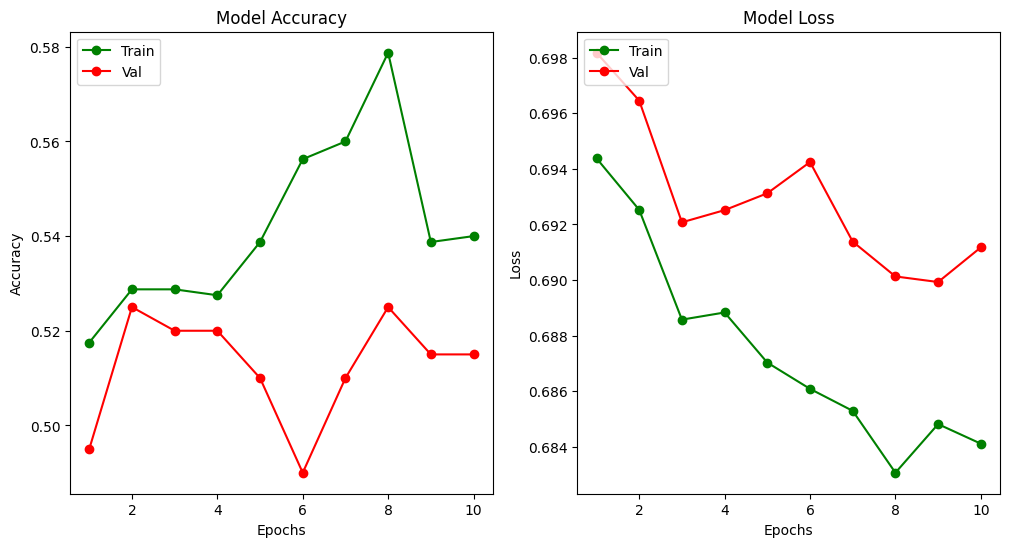

In [ ]:
plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history_snn.history["accuracy"],color = 'green', marker = 'o')
plt.plot(epochs,history_snn.history["val_accuracy"],color = 'red', marker = 'o')
plt.title("Model Accuracy")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Accuracy",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_snn.history["loss"],color = 'green', marker = 'o')
plt.plot(epochs,history_snn.history["val_loss"],color = 'red', marker = 'o')
plt.title("Model Loss")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Loss",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example setup: Replace with your actual data and settings
maxlen = 100  # Maximum length of input sequences
vocab_length = 5000  # Size of the vocabulary (number of unique tokens)
embedding_dim = 100  # Dimension of the embedding vectors

# Example embedding matrix initialization (use your own pre-trained embeddings)
embedding_matrix = np.random.rand(vocab_length, embedding_dim)  # Replace with actual embedding matrix

# Define the model
cnn = Sequential()

# Add the embedding layer
embedding_layer = Embedding(input_dim=vocab_length,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)
cnn.add(embedding_layer)

# Add a 1D convolutional layer
cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(1, activation='sigmoid'))  # For binary classification; adjust if needed

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Example data (replace with your actual data)
x_train = np.random.randint(0, vocab_length, size=(1000, maxlen))  # Example training features
y_train = np.random.randint(2, size=(1000, 1))  # Example binary labels

# Train the model
history_cnn = cnn.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Example test data (replace with your actual data)
x_test = np.random.randint(0, vocab_length, size=(200, maxlen))  # Example test features
y_test = np.random.randint(2, size=(200, 1))  # Example binary test labels

# Evaluate the model
result = cnn.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {result[0]}")
print(f"Test Accuracy: {result[1]}")


Epoch 1/10
25/25 [==============================] - 2s 40ms/step - loss: 0.7650 - accuracy: 0.5038 - val_loss: 0.6932 - val_accuracy: 0.5400
Epoch 2/10
25/25 [==============================] - 1s 32ms/step - loss: 0.6794 - accuracy: 0.5925 - val_loss: 0.7084 - val_accuracy: 0.5050
Epoch 3/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6651 - accuracy: 0.5800 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 4/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6363 - accuracy: 0.7350 - val_loss: 0.6964 - val_accuracy: 0.5150
Epoch 5/10
25/25 [==============================] - 1s 42ms/step - loss: 0.6020 - accuracy: 0.7462 - val_loss: 0.6991 - val_accuracy: 0.4950
Epoch 6/10
25/25 [==============================] - 1s 49ms/step - loss: 0.5608 - accuracy: 0.7900 - val_loss: 0.6963 - val_accuracy: 0.4950
Epoch 7/10
25/25 [==============================] - 1s 50ms/step - loss: 0.5142 - accuracy: 0.9187 - val_loss: 0.7093 - val_accuracy: 0.5150
Epoch 8/10
25

In [ ]:
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          500000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 128)           0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 6144)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 6145      
                                                                 
Total params: 570273 (2.18 MB)
Trainable params: 70273 (274.50 KB)
Non-trainable params: 500000 (1.91 MB)
______________

In [ ]:
history_cnn = cnn.fit(x_train,y_train, batch_size=128, epochs = 10,
                      verbose=1, validation_split =0.2)

Epoch 1/10
7/7 [==============================] - 2s 161ms/step - loss: 0.3419 - accuracy: 0.9825 - val_loss: 0.7254 - val_accuracy: 0.5350
Epoch 2/10
7/7 [==============================] - 1s 90ms/step - loss: 0.3025 - accuracy: 1.0000 - val_loss: 0.7192 - val_accuracy: 0.4900
Epoch 3/10
7/7 [==============================] - 1s 98ms/step - loss: 0.2739 - accuracy: 1.0000 - val_loss: 0.7274 - val_accuracy: 0.5050
Epoch 4/10
7/7 [==============================] - 1s 95ms/step - loss: 0.2517 - accuracy: 1.0000 - val_loss: 0.7237 - val_accuracy: 0.5050
Epoch 5/10
7/7 [==============================] - 1s 92ms/step - loss: 0.2287 - accuracy: 1.0000 - val_loss: 0.7359 - val_accuracy: 0.4950
Epoch 6/10
7/7 [==============================] - 1s 94ms/step - loss: 0.2129 - accuracy: 1.0000 - val_loss: 0.7361 - val_accuracy: 0.5050
Epoch 7/10
7/7 [==============================] - 1s 89ms/step - loss: 0.1896 - accuracy: 1.0000 - val_loss: 0.7330 - val_accuracy: 0.5200
Epoch 8/10
7/7 [==========

In [ ]:
cnn_result = cnn.evaluate(x_test,y_test, verbose = 1)
print("Test Accuracy:", cnn_result[1])
print("Test Loss:", cnn_result[0])

7/7 [==============================] - 0s 11ms/step - loss: 0.7023 - accuracy: 0.5700
Test Accuracy: 0.5699999928474426
Test Loss: 0.702338457107544


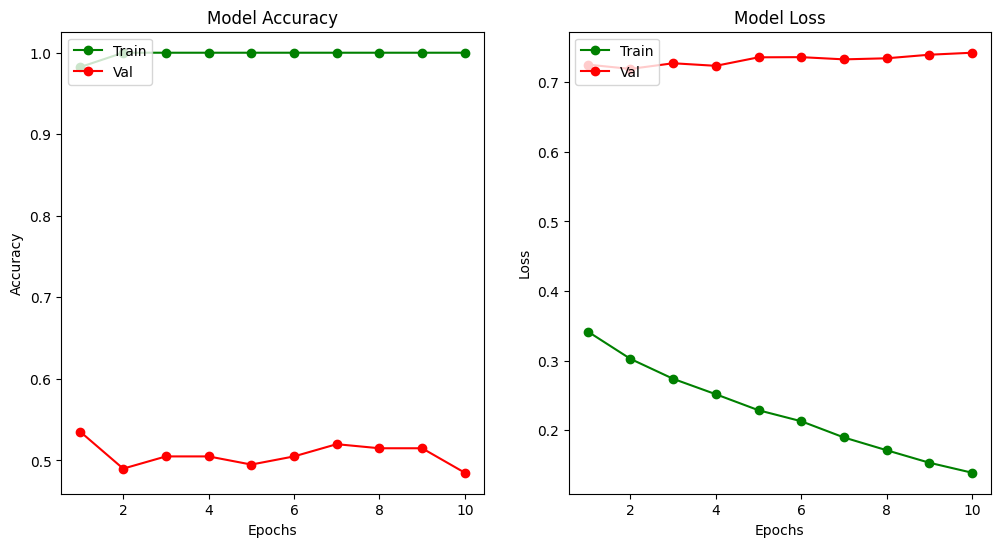

In [ ]:
plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history_cnn.history["accuracy"],color = 'green', marker = 'o')
plt.plot(epochs,history_cnn.history["val_accuracy"],color = 'red', marker = 'o')
plt.title("Model Accuracy")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Accuracy",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_cnn.history["loss"],color = 'green', marker = 'o')
plt.plot(epochs,history_cnn.history["val_loss"],color = 'red', marker = 'o')
plt.title("Model Loss")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Loss",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
lstm = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
lstm.add(embedding_layer)
lstm.add(LSTM(128)) #return_sequences=True
# lstm.add(LSTM(64, return_sequences=True))

# lstm.add(Dropout(0.2))
# lstm.add(LSTM(32))


# cnn.add(Conv1D(256,5,activation = 'relu'))
# cnn.add(GlobalMaxPooling1D())

lstm.add(Dense(1,activation = 'sigmoid'))

In [ ]:
lstm.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          500000    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 617377 (2.36 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 500000 (1.91 MB)
_________________________________________________________________


In [ ]:
history_lstm = lstm.fit(x_train,y_train, batch_size=128, epochs = 10,
                      verbose=1, validation_split =0.2)

Epoch 1/10
7/7 [==============================] - 5s 415ms/step - loss: 0.7270 - accuracy: 0.4825 - val_loss: 0.7507 - val_accuracy: 0.4900
Epoch 2/10
7/7 [==============================] - 3s 433ms/step - loss: 0.7106 - accuracy: 0.4950 - val_loss: 0.7035 - val_accuracy: 0.5100
Epoch 3/10
7/7 [==============================] - 4s 560ms/step - loss: 0.7009 - accuracy: 0.5050 - val_loss: 0.6967 - val_accuracy: 0.4800
Epoch 4/10
7/7 [==============================] - 3s 365ms/step - loss: 0.6911 - accuracy: 0.5238 - val_loss: 0.6974 - val_accuracy: 0.4850
Epoch 5/10
7/7 [==============================] - 2s 321ms/step - loss: 0.6891 - accuracy: 0.5225 - val_loss: 0.6973 - val_accuracy: 0.4850
Epoch 6/10
7/7 [==============================] - 2s 338ms/step - loss: 0.6885 - accuracy: 0.5587 - val_loss: 0.6961 - val_accuracy: 0.5050
Epoch 7/10
7/7 [==============================] - 2s 329ms/step - loss: 0.6860 - accuracy: 0.5838 - val_loss: 0.6956 - val_accuracy: 0.4850
Epoch 8/10
7/7 [====

In [ ]:
lstm_result = lstm.evaluate(x_test,y_test, verbose = 1)
print("Test Accuracy:", lstm_result[1])
print("Test Loss:", lstm_result[0])

7/7 [==============================] - 1s 106ms/step - loss: 0.6973 - accuracy: 0.4800
Test Accuracy: 0.47999998927116394
Test Loss: 0.6972678899765015


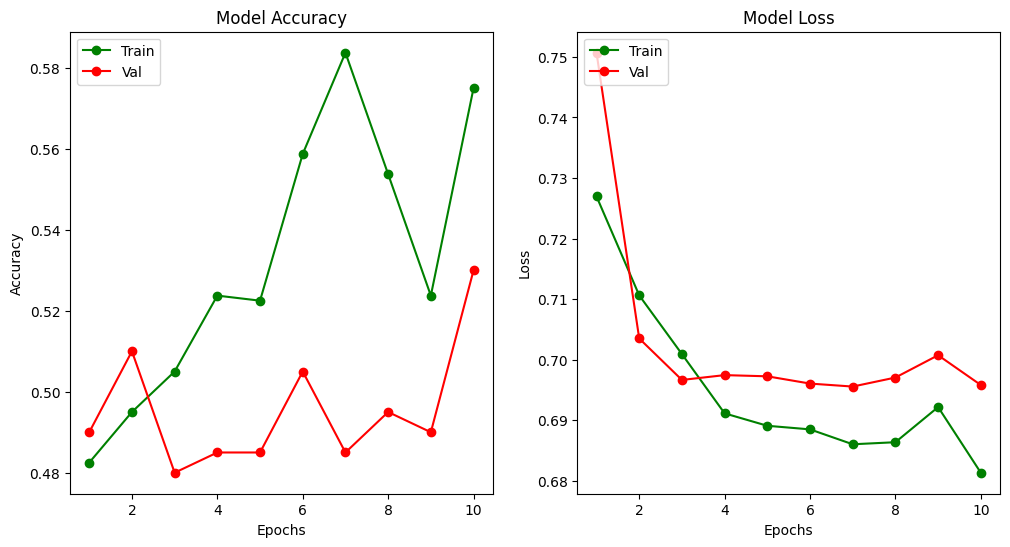

In [ ]:
plt.figure(figsize=(12,6))
epochs = range(1, 11)
plt.subplot(1,2,1)
plt.plot(epochs,history_lstm.history["accuracy"],color = 'green', marker = 'o')
plt.plot(epochs,history_lstm.history["val_accuracy"],color = 'red', marker = 'o')
plt.title("Model Accuracy")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Accuracy",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_lstm.history["loss"],color = 'green', marker = 'o')
plt.plot(epochs,history_lstm.history["val_loss"],color = 'red', marker = 'o')
plt.title("Model Loss")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Loss",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
lstm.save("sentiment_classifier2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
